In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow.keras.preprocessing import text,sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Conv1D,GlobalMaxPooling1D,MaxPooling1D
from sklearn.model_selection import train_test_split
import tensorflow_hub as hub
import tensorflow_text as text
import re    #for regex
import string
import re    #for regex
import nltk
import nltk
nltk.download('stopwords')
from wordcloud import WordCloud
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Daniel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
train = pd.read_csv('IMDB Dataset.csv')

In [3]:
train

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


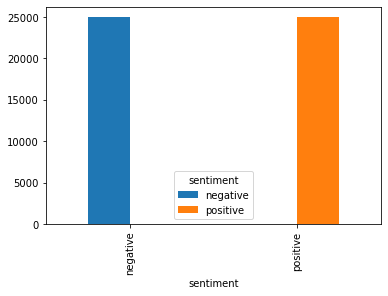

In [4]:
C = ['sentiment']

for i in C:
    ch = pd.crosstab(train[i], train['sentiment'])  
    ch.plot.bar()   
    plt.show() 

In [5]:
train.dtypes

review       object
sentiment    object
dtype: object

In [6]:
labeling = {
    'positive':1, 
    'negative':0
}

train['sentiment'] = train['sentiment'].apply(lambda x : labeling[x])

In [7]:
train.dtypes

review       object
sentiment     int64
dtype: object

In [8]:
clean = {
"aren't" : "are not",
"can't" : "can not",
"couldn't" : "could not",
"didn't" : "did not",
"doesn't" : "does not",
"don't" : "do not",
"hadn't" : "had not",
"hasn't" : "has not",
"haven't" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'd" : "I had",
"i'll" : "I will",
"i'm" : "I am",
"isn't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"let's" : "let us",
"mightn't" : "might not",
"mustn't" : "must not",
"shan't" : "shall not",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"shouldn't" : "should not",
"that's" : "that is",
"there's" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"they've" : "they have",
"we'd" : "we would",
"we're" : "we are",
"weren't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"won't" : "will not",
"wouldn't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"wasn't": "was not",
"we'll":" will",
"didn't": "did not",
"tryin'":"trying"
}

In [9]:
def clean_text(text):
    
    text = text.lower()
    text = re.sub(r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', '', text) # clean url
    text = re.sub(r'#(\w+)', '', text)   # clean hashes
    text = re.sub(r'@(\w+)', '', text)   # clean @
    text = re.sub(r'<[^>]+>', '', text)  # clean tags
    text = re.sub(r'\d+', '', text)      # clean digits
    text = [clean[word] if word in clean else word for word in text.split()] 
    
   
    
    return text

In [10]:
train['review_clean'] = train['review'].apply(lambda x: clean_text(x))

In [11]:
x=train["review_clean"]
y=train["sentiment"]

In [12]:
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.2, random_state=1,shuffle=True)


In [13]:
X_train, X_val, y_train, y_val  = train_test_split(train_x, train_y, test_size=0.16, random_state=1) 

In [14]:
print('Number of reviews in the training set : {}'.format(len(X_train)))
print('Number of reviews in the validation set : {}'.format(len(X_val)))
print('Number of reviews in the testing set : {}'.format(len(test_x)))

Number of reviews in the training set : 33600
Number of reviews in the validation set : 6400
Number of reviews in the testing set : 10000


In [15]:
max_feature = 10000
tokenizer = tf.keras.preprocessing.text.Tokenizer(max_feature,
                                                  lower= True,
                                                  filters= '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
                                                  split = " ")

tokenizer.fit_on_texts(train_x)

In [16]:
sequences = tokenizer.texts_to_sequences(train_x)

In [17]:
pad_sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences,
                                                             maxlen = 300)

In [18]:
test_x_tokenized=tokenizer.texts_to_sequences(test_x)
x_testing=tf.keras.preprocessing.sequence.pad_sequences(test_x_tokenized,maxlen=300)

In [19]:
from keras import backend as K


def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [132]:
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import LSTM
model5 = tf.keras.Sequential()
model5.add(Embedding(7000,256,input_length=300))
model5.add(Conv1D(256,10,activation='relu'))
model5.add(Bidirectional(LSTM(128,return_sequences=True)))
model5.add(LSTM(64))
model5.add(Dropout(0.4))
model5.add(Dense(1,activation='sigmoid',name='classifier'))

In [133]:
model5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 300, 256)          1792000   
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 291, 256)          655616    
_________________________________________________________________
bidirectional_4 (Bidirection (None, 291, 256)          394240    
_________________________________________________________________
lstm_9 (LSTM)                (None, 64)                82176     
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
classifier (Dense)           (None, 1)                 65        
Total params: 2,924,097
Trainable params: 2,924,097
Non-trainable params: 0
____________________________________________

In [134]:
model5.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc',f1_m,precision_m, recall_m]
             )

In [135]:
history = model5.fit(x=pad_sequences, y=train_y, batch_size=128, verbose=1, epochs=10,  validation_split= 0.1/1.0,shuffle=True)

Epoch 1/10
282/282 [==============================] - 23s 66ms/step - loss: 0.4754 - acc: 0.7745 - f1_m: 0.7584 - precision_m: 0.7784 - recall_m: 0.7619 - val_loss: 0.3807 - val_acc: 0.8342 - val_f1_m: 0.8403 - val_precision_m: 0.8044 - val_recall_m: 0.8816
Epoch 2/10
282/282 [==============================] - 18s 65ms/step - loss: 0.3179 - acc: 0.8711 - f1_m: 0.8697 - precision_m: 0.8779 - recall_m: 0.8684 - val_loss: 0.3160 - val_acc: 0.8660 - val_f1_m: 0.8567 - val_precision_m: 0.9158 - val_recall_m: 0.8065
Epoch 3/10
282/282 [==============================] - 19s 66ms/step - loss: 0.2348 - acc: 0.9093 - f1_m: 0.9092 - precision_m: 0.9104 - recall_m: 0.9105 - val_loss: 0.2988 - val_acc: 0.8770 - val_f1_m: 0.8771 - val_precision_m: 0.8829 - val_recall_m: 0.8727
Epoch 4/10
282/282 [==============================] - 19s 66ms/step - loss: 0.1684 - acc: 0.9372 - f1_m: 0.9370 - precision_m: 0.9387 - recall_m: 0.9370 - val_loss: 0.3265 - val_acc: 0.8773 - val_f1_m: 0.8749 - val_precision_m

In [137]:
loss, accuracy, f1_score, precision, recall = model5.evaluate(x_testing, test_y, verbose=0)

In [138]:
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')
print(f'f1: {f1_score}')
print(f'precision: {precision}')
print(f'recall: {recall}')

Loss: 0.6669936776161194
Accuracy: 0.8521000146865845
f1: 0.8448050618171692
precision: 0.85943603515625
recall: 0.8392179012298584


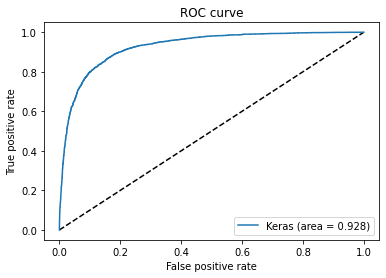

In [139]:
from sklearn.metrics import roc_curve
y_pred_keras =model5.predict(x_testing).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(test_y, y_pred_keras)
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [141]:
from keras.layers.recurrent import LSTM, GRU,SimpleRNN

In [146]:
model6 = tf.keras.Sequential()
model6.add(Embedding(7000,128,input_length=300))
model6.add(SimpleRNN(64))
model6.add(Dense(1, activation='sigmoid'))

In [147]:
model6.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 300, 128)          896000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 64)                12352     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 908,417
Trainable params: 908,417
Non-trainable params: 0
_________________________________________________________________


In [148]:
model6.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc',f1_m,precision_m, recall_m]
             )

In [150]:
history = model6.fit(x=pad_sequences, y=train_y, batch_size=128, verbose=1, epochs=5,  validation_split= 0.1/1.0,shuffle=True)

Epoch 1/5
282/282 [==============================] - 117s 413ms/step - loss: 0.6018 - acc: 0.6778 - f1_m: 0.6631 - precision_m: 0.7002 - recall_m: 0.6703 - val_loss: 0.5408 - val_acc: 0.7308 - val_f1_m: 0.7614 - val_precision_m: 0.6795 - val_recall_m: 0.8695
Epoch 2/5
282/282 [==============================] - 115s 408ms/step - loss: 0.3583 - acc: 0.8475 - f1_m: 0.8464 - precision_m: 0.8521 - recall_m: 0.8469 - val_loss: 0.4008 - val_acc: 0.8325 - val_f1_m: 0.8250 - val_precision_m: 0.8620 - val_recall_m: 0.7927
Epoch 3/5
282/282 [==============================] - 118s 419ms/step - loss: 0.2649 - acc: 0.8935 - f1_m: 0.8965 - precision_m: 0.8872 - recall_m: 0.9105 - val_loss: 0.4468 - val_acc: 0.8205 - val_f1_m: 0.8137 - val_precision_m: 0.8448 - val_recall_m: 0.7875
Epoch 4/5
282/282 [==============================] - 116s 411ms/step - loss: 0.1146 - acc: 0.9618 - f1_m: 0.9618 - precision_m: 0.9640 - recall_m: 0.9604 - val_loss: 0.5558 - val_acc: 0.7958 - val_f1_m: 0.7889 - val_precisi

In [153]:
loss, accuracy, f1_score, precision, recall = model6.evaluate(x_testing, test_y, verbose=0)

In [154]:
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')
print(f'f1: {f1_score}')
print(f'precision: {precision}')
print(f'recall: {recall}')

Loss: 0.6332632899284363
Accuracy: 0.7985000014305115
f1: 0.7949819564819336
precision: 0.7871183156967163
recall: 0.8135754466056824


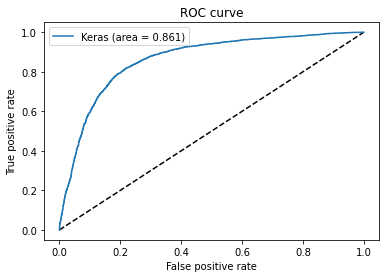

In [155]:
from sklearn.metrics import roc_curve
y_pred_keras =model6.predict(x_testing).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(test_y, y_pred_keras)
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [22]:
from keras.layers.recurrent import LSTM, GRU,SimpleRNN

In [23]:
from keras.layers import SpatialDropout1D

In [24]:
model7 = tf.keras.Sequential()
model7.add(Embedding(3000,64,input_length=300))
model7.add(SpatialDropout1D(0.2))
model7.add(GRU(300))
model7.add(Dense(1, activation='sigmoid'))

model7.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 300, 64)           192000    
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 300, 64)           0         
_________________________________________________________________
gru (GRU)                    (None, 300)               328500    
_________________________________________________________________
dense (Dense)                (None, 1)                 301       
Total params: 520,801
Trainable params: 520,801
Non-trainable params: 0
_________________________________________________________________


In [25]:
model7.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc',f1_m,precision_m, recall_m]
             )

In [26]:
history = model7.fit(x=pad_sequences, y=train_y, batch_size=128, verbose=1, epochs=5,  validation_split= 0.1/1.0,shuffle=True)

Epoch 1/5
282/282 [==============================] - 717s 3s/step - loss: 0.5221 - acc: 0.7264 - f1_m: 0.7414 - precision_m: 0.7275 - recall_m: 0.7806 - val_loss: 0.4334 - val_acc: 0.8065 - val_f1_m: 0.8236 - val_precision_m: 0.7512 - val_recall_m: 0.9140
Epoch 2/5
282/282 [==============================] - 718s 3s/step - loss: 0.3469 - acc: 0.8548 - f1_m: 0.8530 - precision_m: 0.8599 - recall_m: 0.8515 - val_loss: 0.3260 - val_acc: 0.8698 - val_f1_m: 0.8646 - val_precision_m: 0.8875 - val_recall_m: 0.8446
Epoch 3/5
282/282 [==============================] - 716s 3s/step - loss: 0.3013 - acc: 0.8801 - f1_m: 0.8797 - precision_m: 0.8826 - recall_m: 0.8802 - val_loss: 0.2950 - val_acc: 0.8802 - val_f1_m: 0.8806 - val_precision_m: 0.8761 - val_recall_m: 0.8868
Epoch 4/5
282/282 [==============================] - 699s 2s/step - loss: 0.2633 - acc: 0.8955 - f1_m: 0.8952 - precision_m: 0.8983 - recall_m: 0.8949 - val_loss: 0.2994 - val_acc: 0.8798 - val_f1_m: 0.8839 - val_precision_m: 0.8515

In [27]:
loss, accuracy, f1_score, precision, recall = model7.evaluate(x_testing, test_y, verbose=0)

In [28]:
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')
print(f'f1: {f1_score}')
print(f'precision: {precision}')
print(f'recall: {recall}')

Loss: 0.3038695752620697
Accuracy: 0.8733999729156494
f1: 0.8686543703079224
precision: 0.8818132877349854
recall: 0.8638595938682556


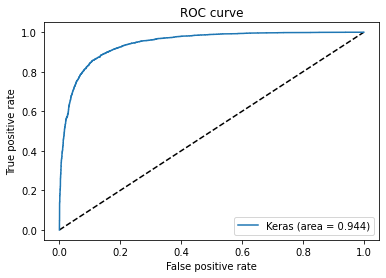

In [29]:
from sklearn.metrics import roc_curve
y_pred_keras =model7.predict(x_testing).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(test_y, y_pred_keras)
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [31]:
from gensim.scripts.glove2word2vec import glove2word2vec

In [32]:
glove_input_file = 'glove.6B.50d.txt'

In [33]:
word2vec_output_file = 'glove.6B.50d.txt.word2vec'

In [34]:
glove2word2vec(glove_input_file, word2vec_output_file)

C:\Users\Daniel\anaconda3\envs\tensorflow_gpu\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  """Entry point for launching an IPython kernel.


(400000, 50)

In [35]:
from gensim.models import Word2Vec, KeyedVectors

# Load pretrained Glove model (in word2vec form)
glove_model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)

#Embedding length based on selected model - we are using 50d here.
embedding_vector_length = 50

In [36]:
embedding_matrix = np.zeros((7000 + 1, embedding_vector_length))
print(embedding_matrix.shape)

(7001, 50)


In [37]:
for word, i in sorted(tokenizer.word_index.items(),key=lambda x:x[1]):
    if i > (7000+1):
        break
    try:
        embedding_vector = glove_model[word] #Reading word's embedding from Glove model for a given word
        embedding_matrix[i] = embedding_vector
    except:
        pass

In [38]:
embedding_matrix.shape

(7001, 50)

In [190]:
model8 = tf.keras.Sequential()
model8.add(tf.keras.layers.Embedding(7000 + 1, #Vocablury size
                                    embedding_vector_length, #Embedding size
                                    weights=[embedding_matrix], #Embeddings taken from pre-trained model
                                    trainable=False, #As embeddings are already available, we will not train this layer. It will act as lookup layer.
                                    input_length=300) #Number of words in each review
         )
model8.add(SimpleRNN(64))
model8.add(Dense(1, activation='sigmoid'))

In [191]:
model8.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 300, 50)           350050    
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 64)                7360      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 65        
Total params: 357,475
Trainable params: 7,425
Non-trainable params: 350,050
_________________________________________________________________


In [192]:
model8.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc',f1_m,precision_m, recall_m]
             )

In [194]:
history = model8.fit(x=pad_sequences, y=train_y, batch_size=128, verbose=1, epochs=10,  validation_split= 0.1/1.0,shuffle=True)

Epoch 1/10
282/282 [==============================] - 105s 374ms/step - loss: 0.6678 - acc: 0.5903 - f1_m: 0.5644 - precision_m: 0.6112 - recall_m: 0.5796 - val_loss: 0.6640 - val_acc: 0.6003 - val_f1_m: 0.5768 - val_precision_m: 0.6115 - val_recall_m: 0.5497
Epoch 2/10
282/282 [==============================] - 105s 371ms/step - loss: 0.6249 - acc: 0.6564 - f1_m: 0.6404 - precision_m: 0.6810 - recall_m: 0.6462 - val_loss: 0.6039 - val_acc: 0.6855 - val_f1_m: 0.7069 - val_precision_m: 0.6552 - val_recall_m: 0.7695
Epoch 3/10
282/282 [==============================] - 105s 374ms/step - loss: 0.6258 - acc: 0.6507 - f1_m: 0.6335 - precision_m: 0.6749 - recall_m: 0.6342 - val_loss: 0.6232 - val_acc: 0.6620 - val_f1_m: 0.6202 - val_precision_m: 0.7036 - val_recall_m: 0.5572
Epoch 4/10
282/282 [==============================] - 104s 370ms/step - loss: 0.6735 - acc: 0.5831 - f1_m: 0.5469 - precision_m: 0.5956 - recall_m: 0.5673 - val_loss: 0.6651 - val_acc: 0.5920 - val_f1_m: 0.5966 - val_pre

In [196]:
loss, accuracy, f1_score, precision, recall = model8.evaluate(x_testing, test_y, verbose=0)

In [197]:
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')
print(f'f1: {f1_score}')
print(f'precision: {precision}')
print(f'recall: {recall}')

Loss: 0.8031731247901917
Accuracy: 0.5782999992370605
f1: 0.6906901001930237
precision: 0.5413169860839844
recall: 0.970121443271637


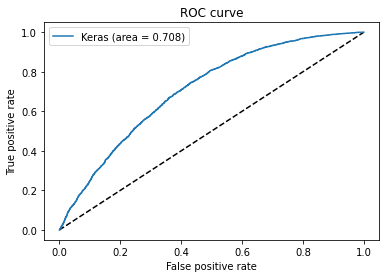

In [198]:
from sklearn.metrics import roc_curve
y_pred_keras =model8.predict(x_testing).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(test_y, y_pred_keras)
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [47]:
from tensorflow.keras.layers import Bidirectional
model9=Sequential()
model9.add(tf.keras.layers.Embedding(7000 + 1, #Vocablury size
                                    embedding_vector_length, #Embedding size
                                    weights=[embedding_matrix], #Embeddings taken from pre-trained model
                                    trainable=False, #As embeddings are already available, we will not train this layer. It will act as lookup layer.
                                    input_length=300)) #Number of words in each review
model9.add(Bidirectional(LSTM(256,return_sequences=True,dropout=0.3)))
model9.add(Dense(64))
model9.add(Dropout(0.3))
model9.add(Dense(1,activation='sigmoid'))





In [48]:
model9.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 300, 50)           350050    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 300, 512)          628736    
_________________________________________________________________
dense_2 (Dense)              (None, 300, 64)           32832     
_________________________________________________________________
dropout_1 (Dropout)          (None, 300, 64)           0         
_________________________________________________________________
dense_3 (Dense)              (None, 300, 1)            65        
Total params: 1,011,683
Trainable params: 661,633
Non-trainable params: 350,050
_________________________________________________________________


In [49]:
model9.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(3e-3),metrics=['accuracy'])

In [50]:
history = model9.fit(x=pad_sequences, y=train_y, batch_size=128, verbose=1, epochs=5,  validation_split= 0.1,shuffle=True)

Epoch 1/5
282/282 [==============================] - 1705s 6s/step - loss: 0.6677 - accuracy: 0.5721 - val_loss: 0.6159 - val_accuracy: 0.6223
Epoch 2/5
282/282 [==============================] - 1727s 6s/step - loss: 0.6178 - accuracy: 0.6213 - val_loss: 0.5781 - val_accuracy: 0.6460
Epoch 3/5
282/282 [==============================] - 1779s 6s/step - loss: 0.4810 - accuracy: 0.7714 - val_loss: 0.4153 - val_accuracy: 0.8100
Epoch 4/5
282/282 [==============================] - 1784s 6s/step - loss: 0.4358 - accuracy: 0.8001 - val_loss: 0.4021 - val_accuracy: 0.8171
Epoch 5/5
282/282 [==============================] - 1782s 6s/step - loss: 0.4094 - accuracy: 0.8146 - val_loss: 0.3607 - val_accuracy: 0.8384
